In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

A simple data loading function.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "rb"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # rescale final two features - they are very big naturally
    X[:,-1] = np.log(X[:,-1])
    X[:,-2] = np.log(X[:,-2])
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

Functionality for performing gradient descent using the squared margin cost - gradient computation, descent loop, etc.,

In [3]:
# function for computing the softmax cost gradient
def compute_gradient(X,y,w):
    # produce gradient for each class weights
    grad = 0
    for p in range(0,len(y)):
        x_p = X[:,p]
        y_p = y[p]
        grad+= -2*max(0,1 - y_p*np.dot(x_p.T,w))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

# gradient descent function for softmax cost/logistic regression 
def squared_margin_grad(X,y):
    # Initializations 
    w = np.zeros((np.shape(X)[0],1));        # random initial point
    alpha = 10**-6
    k = 1
    max_its = 500
    misclass_history = []
    for k in range(max_its):
        # compute gradient
        grad = compute_gradient(X,y,w)
        
        # take gradient step
        w = w - alpha*grad;
        
        # update history container
        cost = count_misclasses(X,y,w)
        misclass_history.append(cost)
    return misclass_history

# function for counting the number of misclassifications
def count_misclasses(X,y,w):
    y_pred = np.sign(np.dot(X.T,w))
    num_misclassed = len(y) - len([i for i, j in zip(y, y_pred) if i == j])
    return num_misclassed

With everything setup its time to run all.

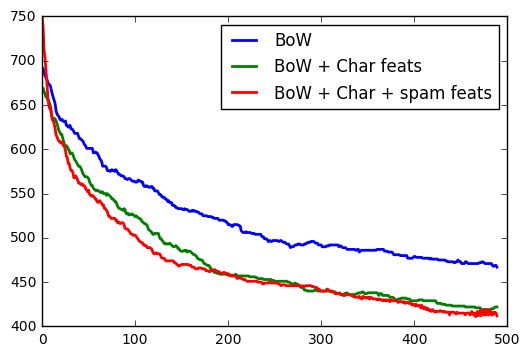

In [4]:
# load in data
X,y = load_data('spambase_data.csv')

# run gradient descent - with 
history_1 = squared_margin_grad(X[0:48,:],y)
history_2 = squared_margin_grad(X[0:54,:],y)
history_3 = squared_margin_grad(X,y)

# plot histories
plt.plot(history_1[10:],linewidth = 2)
plt.plot(history_2[10:],linewidth = 2)
plt.plot(history_3[10:],linewidth = 2)

plt.legend(['BoW','BoW + Char feats','BoW + Char + spam feats'])
plt.show()